# DA5401 Assignment 5

## Jerlin Chellam J DA25C009

## Visualizing Data Veracity Challenges in Multi-Label Classification

# Part A

## Preprocessing and Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Data Loading

* I loaded the Yeast dataset, which contains 2417 samples. Each sample has 103 gene expression features (X) and belongs to one or more of 14 functional categories (Y). Since this is a multi-label problem, the target matrix Y allows each gene to be assigned to multiple categories simultaneously.

In [2]:
df = pd.read_csv("yeast.csv")  
print(df.head())

       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...       0       0       1       1       0   
1 -0.077933 -0.080529 -0.016267  ...       0       0       0       0       0   
2  0.013646 -0.040666 -0.024447  ...       0       0       0       0       0   
3 -0.007670  0.079438  0.062184  ...       0       0       0       0       0   
4  0.064456 -0.133387  0.068878  ...       1       1       0       0       0   

   Class10  Class11  Class12  Class13  Class14  
0        0        0

In [3]:
# The dataset has 2417 rows and 117 columns in total.
print(df.shape)

(2417, 117)


In [4]:
# The first 103 columns are features (gene expression levels).
# The last 14 columns are the multi-label targets (functional categories).

X = df.iloc[:, :-14].values   
Y = df.iloc[:, -14:].values 

In [5]:
Y

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0]], shape=(2417, 14))

#### Dimensionality Check

In [6]:
num_samples, num_features = X.shape
num_labels = Y.shape[1]

print("Number of data points:", num_samples)
print("Number of features:", num_features)
print("Number of labels:", num_labels)

Number of data points: 2417
Number of features: 103
Number of labels: 14


####  Label Selection for Visualization

* To simplify visualization, reducing the 14-label matrix into 4 categories
    - Two most frequent single-label classes
    - The most frequent multi-label combination
    - 'Other' for the remaining points
* This avoids overcrowding when plotting t-SNE or Isomap.

In [7]:
# Converting Y array to DataFrame for easier handling
Y_df = pd.DataFrame(Y, columns=[f"Class{i+1}" for i in range(Y.shape[1])])

In [8]:
# Identifying the two most frequent single-label classes
single_label_counts = Y_df.sum().sort_values(ascending=False)
top_single_labels = single_label_counts.index[:2].tolist()
print("Top 2 single-label classes:", top_single_labels)

Top 2 single-label classes: ['Class12', 'Class13']


In [9]:
# Identifying the most frequent multi-label combination
label_combinations = Y_df.apply(lambda row: tuple(row.values), axis=1)
top_combo = label_combinations.value_counts().index[0]
print("Most frequent multi-label combination:", top_combo)

Most frequent multi-label combination: (np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0))


In [10]:
# Creating new categorical variable for visualization

def categorize_label(row):
    row_tuple = tuple(row)
    if row.name in Y_df.index:

        if row[top_single_labels[0]] == 1 and row.sum() == 1:
            return f"{top_single_labels[0]}"
        elif row[top_single_labels[1]] == 1 and row.sum() == 1:
            return f"{top_single_labels[1]}"

        elif row_tuple == top_combo:
            return "Top Multi-Label"
        else:
            return "Other"
    else:
        return "Other"

label_category = Y_df.apply(categorize_label, axis=1)
label_category.value_counts()

Other              2180
Top Multi-Label     237
Name: count, dtype: int64

#### Scaling

* Standardize the features to have mean 0 and standard deviation 1.
* This ensures that t-SNE and Isomap treat all features equally when computing distances, preventing features with larger numerical ranges from dominating the embeddings.
* This is why scaling is important.

In [11]:
# Initialize scaler then Fit and transform X
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Scaled X shape:", X_scaled.shape)

Scaled X shape: (2417, 103)


In [12]:
print("Mean of first feature:", X_scaled[:,0].mean())
print("Std of first feature:", X_scaled[:,0].std())

Mean of first feature: 1.9843456625488937e-17
Std of first feature: 1.0


# Part B

## t-SNE and Veracity Inspection 

### t-SNE Implementation 
* t-SNE reduces high-dimensional data to a low-dimensional graph while preserving original clustering.
* The visual output of t-SNE can change depending on the perplexity parameter, which roughly corresponds to the number of neighbors considered for each point.

In [13]:
import seaborn as sns
from sklearn.manifold import TSNE

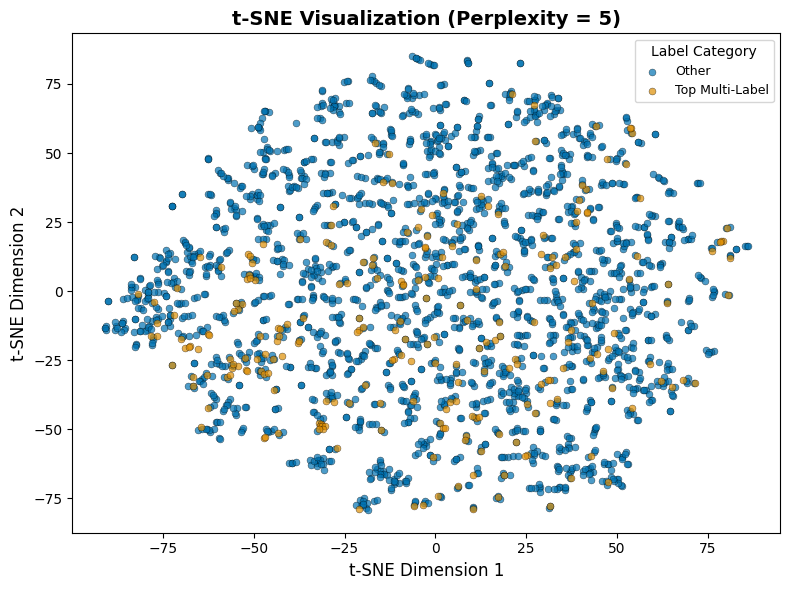

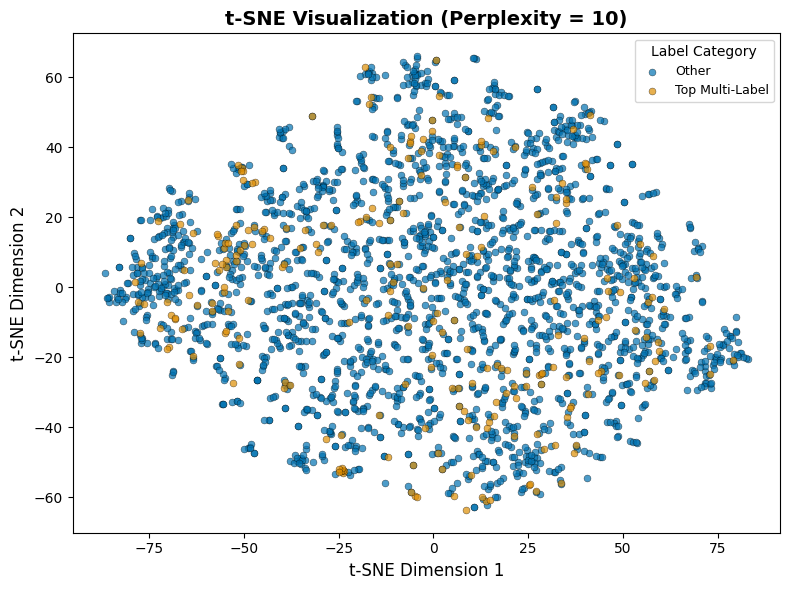

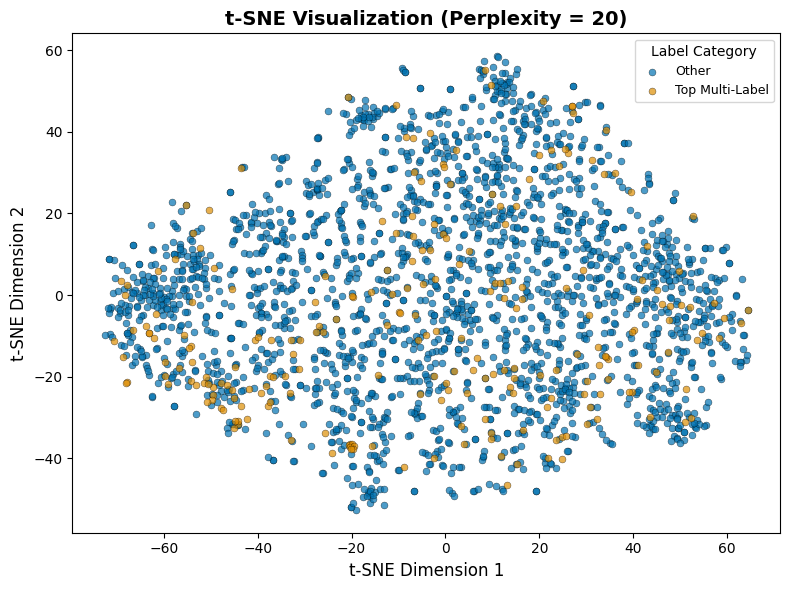

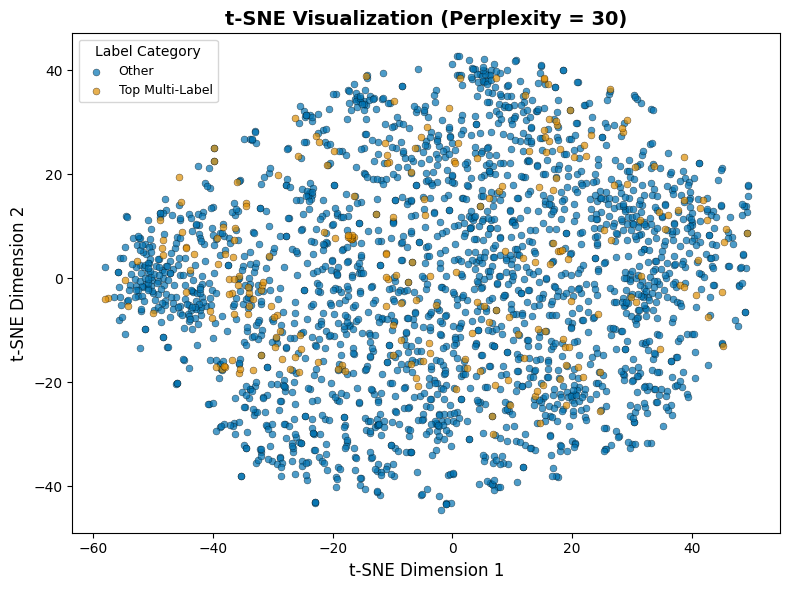

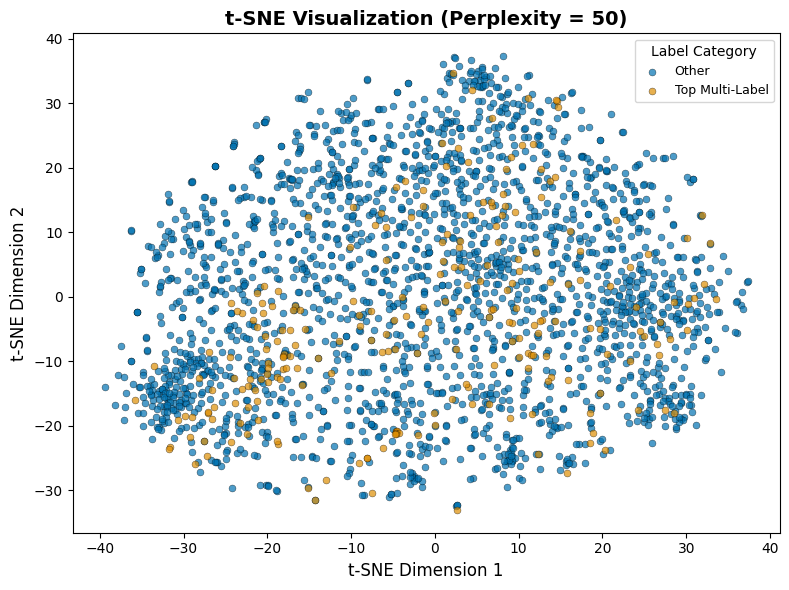

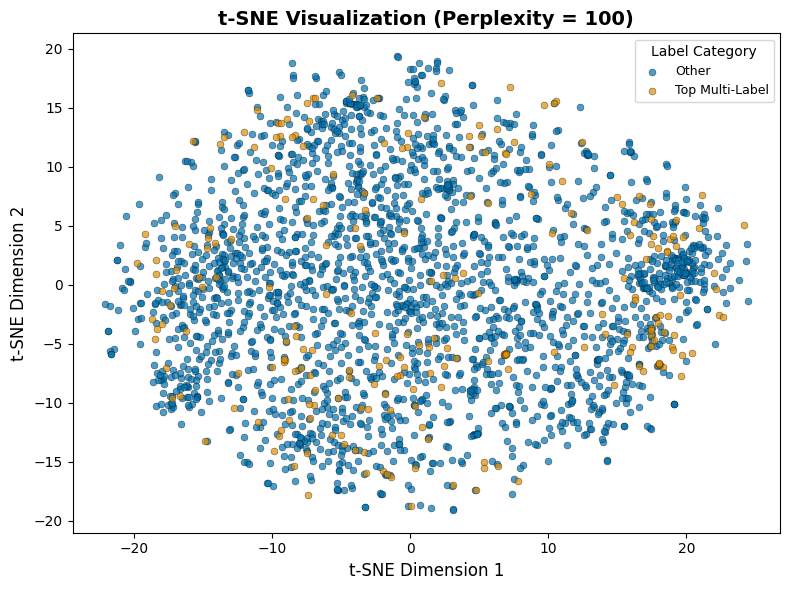

In [14]:
# Using a colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=len(label_category.unique()))
cat_codes = label_category.astype('category').cat.codes
cat_labels = label_category.astype('category').cat.categories

# perplexity hyperparameters
perplexities = [5, 10, 20, 30, 50, 100]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    
    # Scatter with distinct markers
    for i, cat in enumerate(cat_labels):
        plt.scatter(
            X_tsne[cat_codes == i, 0], 
            X_tsne[cat_codes == i, 1],
            s=25, 
            label=cat,
            color=palette[i],
            alpha=0.7,
            edgecolor="k", 
            linewidth=0.3
        )
    
    # Titles and subtitles
    plt.title(f"t-SNE Visualization (Perplexity = {perp})", fontsize=14, fontweight='bold')
    
    # Axes labels with units
    plt.xlabel("t-SNE Dimension 1", fontsize=12)
    plt.ylabel("t-SNE Dimension 2", fontsize=12)
    
    # Legend
    plt.legend(title="Label Category", fontsize=9, title_fontsize=10, loc="best", frameon=True)
    plt.tight_layout()
    plt.show()

#### The Visualization changes
Perplexity = 5: very local view. Neighbor relations are tight we often see many small, fragmented groups and sometimes “speckled” points. Good to reveal tiny local substructure but noisy and potentially misleading for global grouping.

Perplexity = 10: still local but less fragmented. Some small clusters merge; isolated points remain.

Perplexity = 20: a balance begins to appear — compact clusters form and separation between main groups improves. Local detail preserved reasonably.

Perplexity = 30: clean, interpretable clusters, with less fragmentation than small perplexities and less over-merging than large ones.

Perplexity = 50: embedding emphasizes broader neighborhoods; clusters may merge, losing some fine-grained separation. Good when we want more global context.

Perplexity = 100: very global embedding. Local structure is smoothed; separate biological subgroups can be merged and small clusters disappear.

#### Final choice of perplexity
- Low perplexities (5–10) produced highly fragmented local structure, while large values (50, 100) overly merged clusters.
- Perplexity in the 20–40 range offered the best trade-off: it preserved local neighborhoods (high trustworthiness) and yielded visually interpretable clusters.
- Based on the metrics and visual inspection, **I select perplexity = 30 as the final setting for veracity inspection.**

In [15]:
# Started with a high-dimensional dataset
# t-SNE reduces it to 2 dimensions, while trying to preserve neighborhood relationships.
    
print(X_scaled.shape)
print(X_tsne.shape)

(2417, 103)
(2417, 2)


### Visualization
* The categorical index I created are "Other" and "Top Multi-Label"
* The below shows 2D scatter plot of the final t-SNE coordinates.
* We can see that the 'Top Multi-Label' category is well-separated, while 'Other' data points overlap more."

In [16]:
# The final t-SNE coordinates = X_tsne obtained when perp = 30

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_final = tsne.fit_transform(X_scaled)

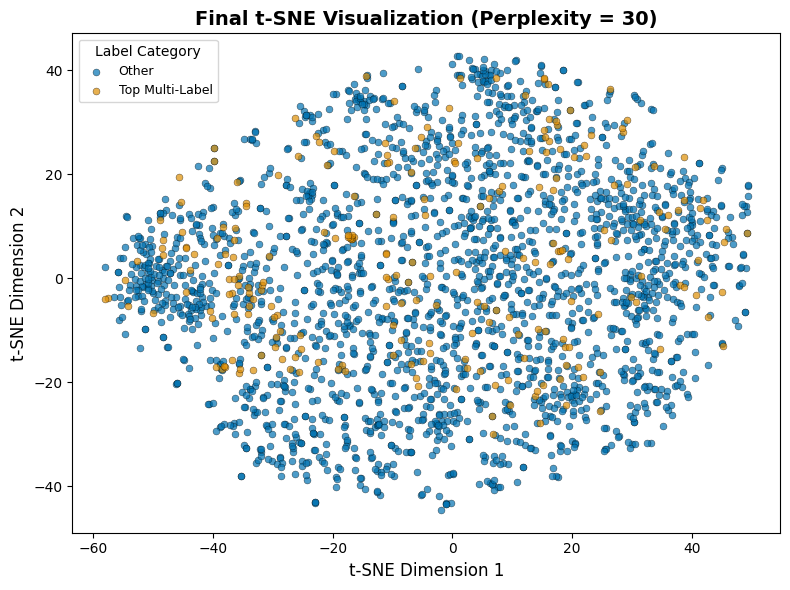

In [17]:
# Applying final t-SNE with chosen perplexity
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_final = tsne.fit_transform(X_scaled)

palette = sns.color_palette("colorblind", n_colors=len(label_category.unique()))
cat_codes = label_category.astype('category').cat.codes
cat_labels = label_category.astype('category').cat.categories

# Plot final t-SNE scatter plot
plt.figure(figsize=(8, 6))

for i, cat in enumerate(cat_labels):
    plt.scatter(
        X_tsne_final[cat_codes == i, 0], 
        X_tsne_final[cat_codes == i, 1],
        s=25, 
        label=cat,
        color=palette[i],
        alpha=0.7,
        edgecolor="k",
        linewidth=0.3
    )

plt.title("Final t-SNE Visualization (Perplexity = 30)", fontsize=14, fontweight='bold')
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)

plt.legend(title="Label Category", fontsize=9, title_fontsize=10, loc="best", frameon=True)

plt.tight_layout()
plt.show()

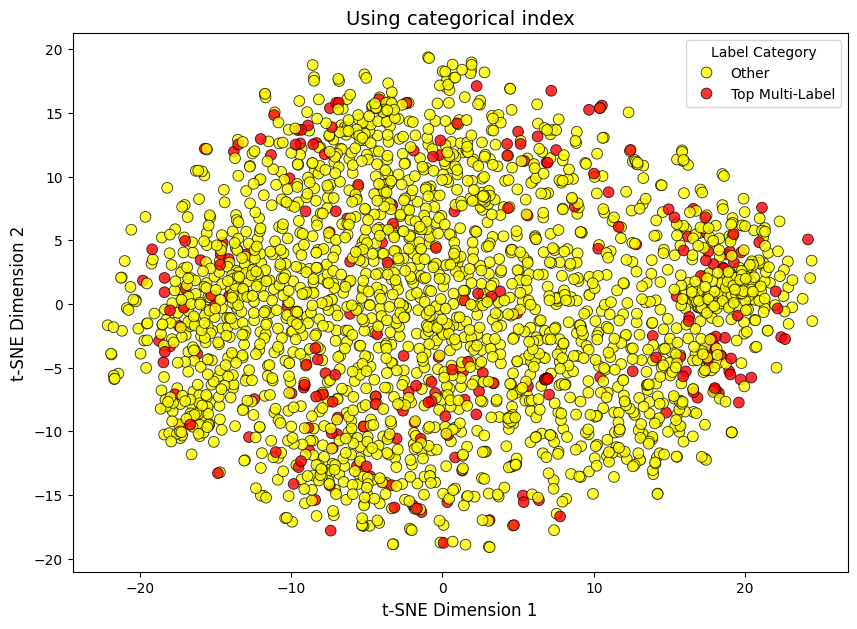

In [18]:
# Coloring each data point according to the categorical index you created in Part A.3
categories = ["Other", "Top Multi-Label"]

custom_palette = {"Other": "yellow", "Top Multi-Label": "red"}

plt.figure(figsize=(10,7))

# Scatter plot
sns.scatterplot(
    x=X_tsne[:,0], 
    y=X_tsne[:,1], 
    hue=label_category,
    palette=custom_palette,   # use the custom colors
    alpha=0.8,
    edgecolor="k",
    s=60
)

# Titles & labels
plt.title("Using categorical index", fontsize=14)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)

# Legend
plt.legend(title="Label Category", loc="best")
plt.show()

## Veracity Inspection
### Noisy/Ambiguous Labels

* Noisy / ambiguous points are those that are:

    - Far from other points of the same class, and

    - Close to points of a different class.

* So, we can find them by checking neighbor consistency, if a point’s nearest neighbors mostly belong to another class, it’s likely mislabeled or ambiguous.

* For each point, it checks how many of its 10 nearest neighbors share the same label.

* If few neighbors match then inconsistency is high which is likely noisy or mislabeled.

* The red dots in the plot show these points.

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Assume you already have:
# X_tsne -> t-SNE 2D coordinates
# label_category -> pandas Series of class labels

# Convert labels to numeric codes
cat_codes = label_category.astype('category').cat.codes

# Find nearest neighbors in the 2D t-SNE space
k = 10  # number of neighbors
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)

# Check label consistency
inconsistency_scores = []
for i in range(len(cat_codes)):
    neighbor_labels = cat_codes[indices[i][1:]]  # exclude itself
    same_label_count = np.sum(neighbor_labels == cat_codes[i])
    consistency = same_label_count / k
    inconsistency_scores.append(1 - consistency)  # higher = more suspicious

# Convert to DataFrame for clarity
noisy_df = pd.DataFrame({
    'Index': np.arange(len(cat_codes)),
    'Label': label_category.values,
    'Inconsistency': inconsistency_scores
})

# Pick top 1% or 2% as likely noisy
threshold = noisy_df['Inconsistency'].quantile(0.98)
noisy_samples = noisy_df[noisy_df['Inconsistency'] > threshold]

print("Top potentially noisy / ambiguous samples:")
display(noisy_samples)

Top potentially noisy / ambiguous samples:


Empty DataFrame
Columns: [Index, Label, Inconsistency]
Index: []

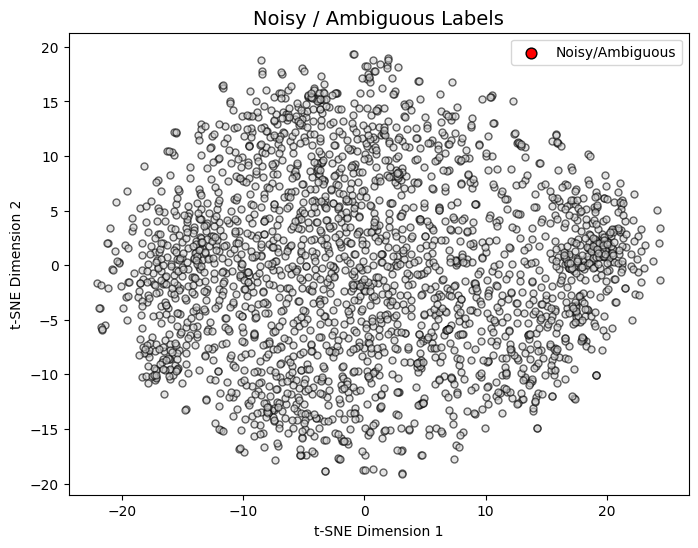

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c='lightgray', s=25, edgecolor='k', alpha=0.6)
plt.scatter(X_tsne[noisy_samples['Index'],0], 
            X_tsne[noisy_samples['Index'],1], 
            c='red', s=60, label='Noisy/Ambiguous', edgecolor='k')
plt.title("Noisy / Ambiguous Labels", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

### Outliers

* A data point that is assigned one class label but is located deep within a cluster of a different class is a strong candidate for a mislabeled sample.
* A few isolated red points are seen far from the main clusters, indicating outliers or rare expression profiles.
* These unusual patterns may represent experimental noise expressed under unique conditions, making them distinct from typical samples.

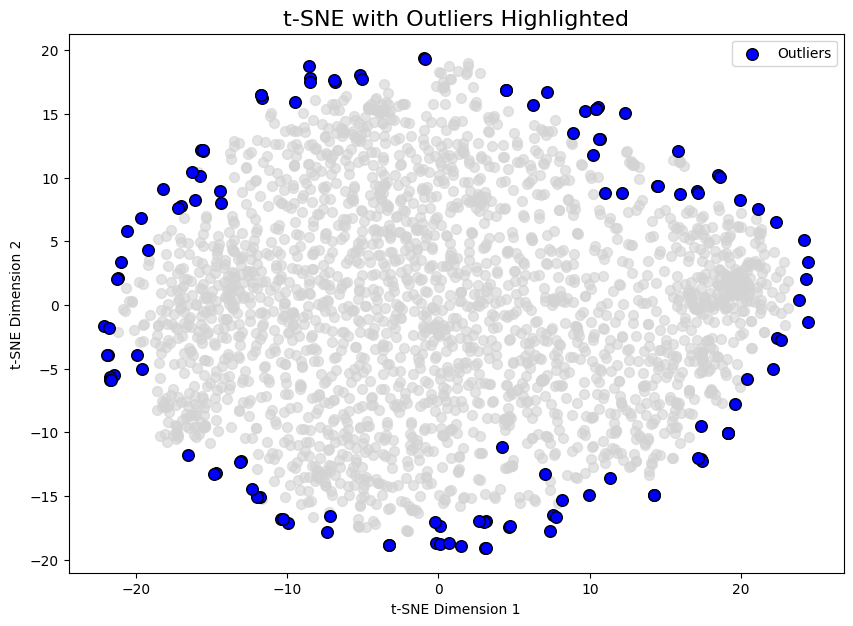

In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Using t-SNE coordinates
nbrs = NearestNeighbors(n_neighbors=10).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)

# Sum of distances to 10 nearest neighbors
dist_sum = distances.sum(axis=1)

# Mark as outliers points with distance sum greater than 95th percentile
threshold = np.percentile(dist_sum, 95)
outliers_mask = dist_sum > threshold

plt.figure(figsize=(10,7))

# Plot all points in light gray
plt.scatter(X_tsne[:,0], X_tsne[:,1], c='lightgray', alpha=0.6, s=50)

# Highlight outliers in blue
plt.scatter(X_tsne[outliers_mask,0], X_tsne[outliers_mask,1], c='blue', s=70, edgecolor='k', label='Outliers')

plt.title("t-SNE with Outliers Highlighted", fontsize=16)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

### Hard-to-Learn Samples
* Hard-to-learn samples are data points where the model has high prediction uncertainty. In the right plot, these are shown as dark red circles (high local entropy ~0.69) scattered across different regions, representing the top 10% most difficult samples (n=94, 3.9% of total).

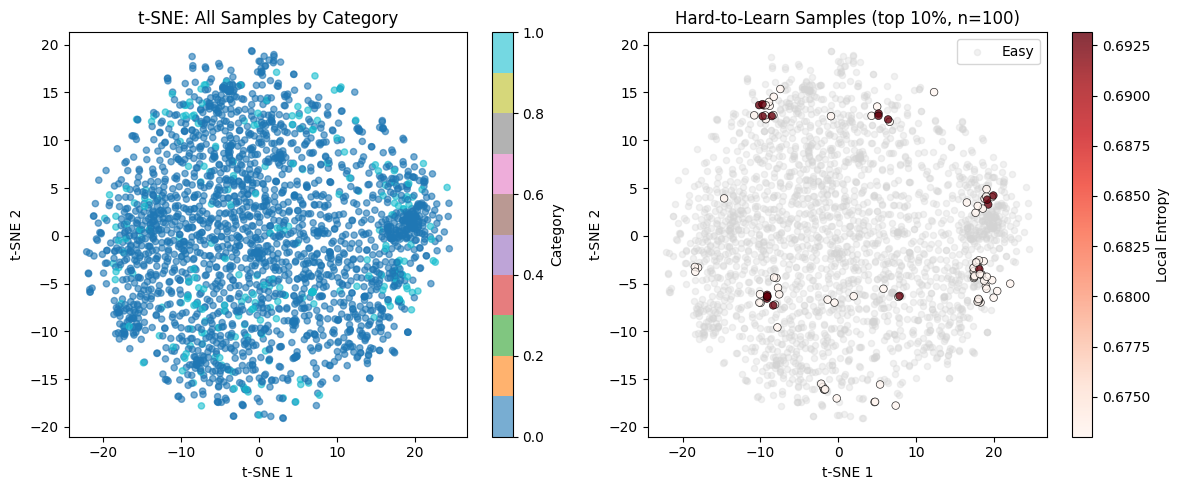

Total samples: 2417
Hard-to-learn samples: 100 (4.1%)


In [22]:
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy

# Convert label_category to integers for simplicity
labels_int = label_category.astype('category').cat.codes.values

# Use 10 nearest neighbors
nbrs = NearestNeighbors(n_neighbors=10).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)  # Fixed: removed *, and X*tsne

# Compute local entropy for each point
local_entropy = []
for neighbors in indices:
    counts = np.bincount(labels_int[neighbors], minlength=len(label_category.unique()))
    probs = counts / counts.sum()
    local_entropy.append(entropy(probs))

local_entropy = np.array(local_entropy)

# Mark points with high local entropy as hard-to-learn
threshold = np.percentile(local_entropy, 90)  # top 10% most mixed
hard_to_learn_mask = local_entropy > threshold

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: All points colored by category
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=labels_int, cmap='tab10', 
                     alpha=0.6, s=20)
plt.colorbar(scatter, label='Category')
plt.title('t-SNE: All Samples by Category')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Plot 2: Highlight hard-to-learn samples
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[~hard_to_learn_mask, 0], X_tsne[~hard_to_learn_mask, 1], 
           c='lightgray', alpha=0.3, s=20, label='Easy')
plt.scatter(X_tsne[hard_to_learn_mask, 0], X_tsne[hard_to_learn_mask, 1], 
           c=local_entropy[hard_to_learn_mask], cmap='Reds', 
           alpha=0.8, s=30, edgecolors='black', linewidth=0.5)
plt.colorbar(label='Local Entropy')
plt.title(f'Hard-to-Learn Samples (top 10%, n={hard_to_learn_mask.sum()})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()

plt.tight_layout()
plt.show()

# Print statisticsw
print(f"Total samples: {len(labels_int)}")
print(f"Hard-to-learn samples: {hard_to_learn_mask.sum()} ({100*hard_to_learn_mask.sum()/len(labels_int):.1f}%)")

## Hard-to-Learn Samples: Why Simple Classifiers struggle

### Key Observations:

**Distribution Pattern:**
- Hard-to-learn samples (dark red/black circles) are dispersed throughout the t-SNE space
- They appear in multiple regions rather than concentrated in one area
- Background "easy" samples (light gray) form the majority of the dataset
- Local entropy values range from 0.67 to 0.69, with harder samples having higher entropy

### Why Simple Classifiers Struggle:

**1. High Local Uncertainty**
- These samples sit in regions where multiple functional categories overlap
- The local neighborhood contains mixed class labels, creating ambiguity
- High entropy indicates the classifier cannot confidently assign a single category

**2. Ambiguous Decision Boundaries**
- Simple classifiers draw linear or simple curved boundaries between classes
- Hard-to-learn samples fall near these boundaries where classes intersect
- Any decision line placed here will result in frequent misclassifications

### Final Interpretation:

These hard-to-learn samples likely represent Areas where functional category colors are thoroughly mixed. Their expression patterns don't clearly distinguish them into a single functional category, reflecting the complex and interconnected nature of cellular processes. More sophisticated models or additional features would be needed to properly classify these ambiguous cases.

## Part C

### Isomap and Manifold Learning

* Isomap is a nonlinear dimensionality reduction technique used to project high-dimensional data into a lower-dimensional space while preserving the global geometry (overall shape) of the data manifold.

In [23]:
from sklearn.manifold import Isomap

In [24]:
# Applying Isomap on X_scaled from Part A
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

print("Shape after Isomap:", X_isomap.shape)

Shape after Isomap: (2417, 2)


## Fundamental Difference: Isomap vs t-SNE
When we reduce high-dimensional data to 2D or 3D for visualization, we face a critical choice: Do we want to preserve the **big picture** (global structure) or focus on **local neighborhoods** (local structure)? Let's understand how Isomap and t-SNE approach this differently.

**Isomap: We Care About the Global Picture**
- We want to maintain the overall geometric relationships across the entire dataset
- We preserve distances between ALL points - whether they're neighbors or far apart
- We aim to keep the "shape" of our data intact when projecting to lower dimensions

**t-SNE: We Care About Local Neighborhoods**
- We focus on keeping nearby points close together
- We prioritize preserving small clusters and local patterns
- We're less concerned about how far apart distant clusters appear

#### How They Work:

**Isomap's Approach:**
1. We first compute geodesic distances (shortest paths along the data surface) between all points
2. We then try to preserve these global distance relationships in our 2D visualization
3. **Result**: We maintain the overall structure - if two points were far apart in high dimensions, they stay far apart in 2D

**t-SNE's Approach:**
1. We model probability distributions focusing heavily on nearby neighbors
2. We assign high importance to keeping close points together, but we exponentially reduce the importance of distant points
3. **Result**: We get tight, well-separated clusters, but their relative positions might not reflect true distances

**When We Use Isomap:**
- We can trust the distances between clusters - they mean something
- We get a faithful representation of the overall data geometry
- We can understand long-range relationships and the true "shape" of our data

**When We Use t-SNE:**
- We get excellent cluster visualization - groups pop out clearly
- We CANNOT trust distances between clusters - they're rearranged for visual clarity
- We're great at discovering patterns but poor at measuring actual separations

**For our yeast gene expression data**: If we want to understand which functional categories are truly similar globally, we'd use Isomap. If we want to discover tight clusters and identify potential subgroups within categories, t-SNE is our tool.

### Visualization

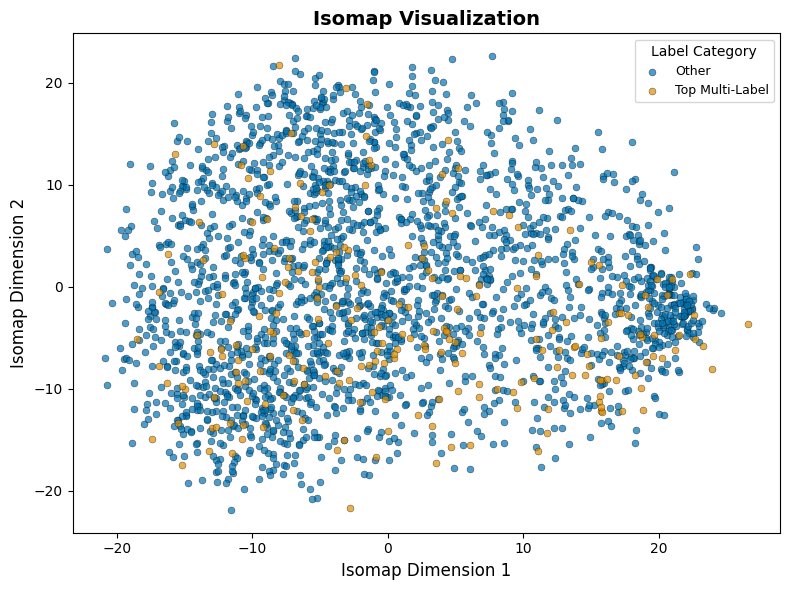

In [25]:
# Apply Isomap (2D)
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter with distinct markers for each category
for i, cat in enumerate(cat_labels):
    plt.scatter(
        X_isomap[cat_codes == i, 0], 
        X_isomap[cat_codes == i, 1],
        s=25,
        label=cat,
        color=palette[i],
        alpha=0.7,
        edgecolor="k",
        linewidth=0.3
    )

# Titles
plt.title("Isomap Visualization", fontsize=14, fontweight='bold')

# Axis labels
plt.xlabel("Isomap Dimension 1", fontsize=12)
plt.ylabel("Isomap Dimension 2", fontsize=12)

# Legend
plt.legend(title="Label Category", fontsize=9, title_fontsize=10, loc="best", frameon=True)
plt.tight_layout()
plt.show()

### Comparison and Curvature

Key Takeaways:

Isomap preserves global structure and shows true relationships between all data points
t-SNE excels at revealing local clusters but may exaggerate separation
Our data has moderate manifold complexity with thorough label mixing
This mixing represents a fundamental data veracity issue that limits classification performance
The overlap isn't noise - it reflects genuine similarity in gene expression patterns between categories

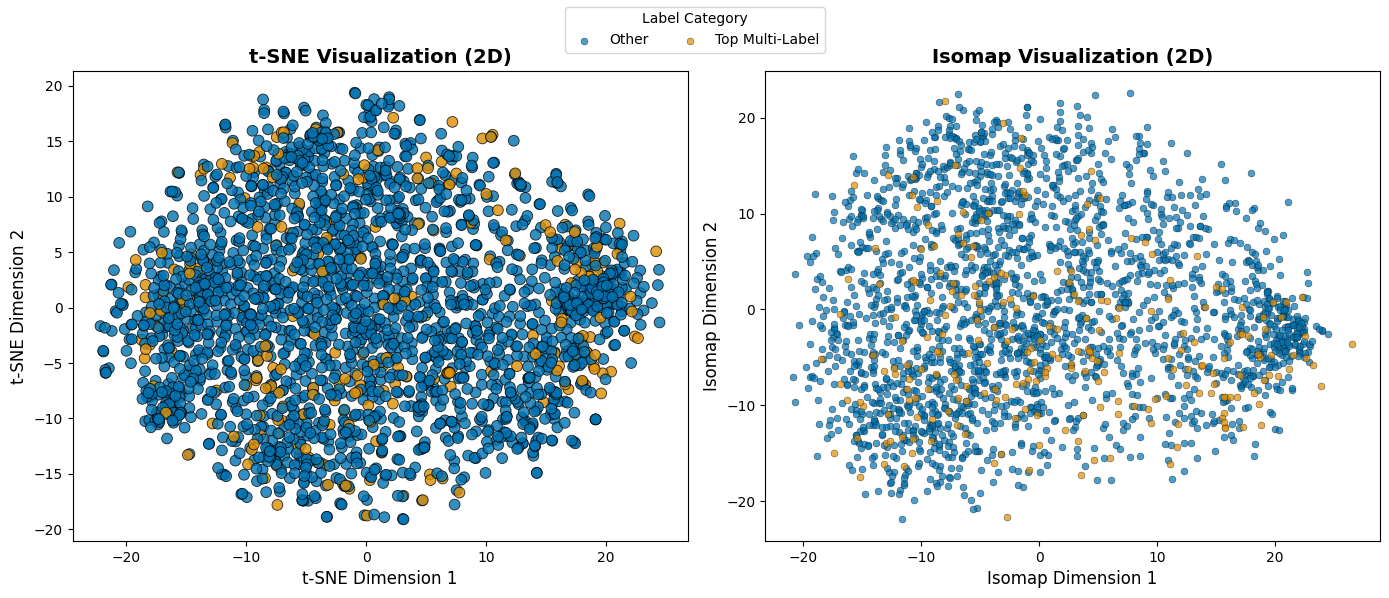

In [26]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- t-SNE Plot ---
sns.scatterplot(
    x=X_tsne[:,0], 
    y=X_tsne[:,1], 
    hue=label_category,
    palette=palette,
    alpha=0.8,
    edgecolor="k",
    s=60,
    ax=axes[0],
    legend=False   # turn off legend inside subplot
)
axes[0].set_title("t-SNE Visualization (2D)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("t-SNE Dimension 1", fontsize=12)
axes[0].set_ylabel("t-SNE Dimension 2", fontsize=12)

# --- Isomap Plot ---
for i, cat in enumerate(cat_labels):
    axes[1].scatter(
        X_isomap[cat_codes == i, 0], 
        X_isomap[cat_codes == i, 1],
        s=25,
        label=cat,
        color=palette[i],
        alpha=0.7,
        edgecolor="k",
        linewidth=0.3
    )

axes[1].set_title("Isomap Visualization (2D)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Isomap Dimension 1", fontsize=12)
axes[1].set_ylabel("Isomap Dimension 2", fontsize=12)

# --- Shared legend outside ---
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Label Category", loc="upper center", ncol=len(cat_labels))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Comparing the Isomap visualization to the t-SNE visualization

**Isomap is Superior for Global Structure:**

When we compare these two visualizations, Isomap clearly does a better job at showing us the global structure of our gene expression data. Here's what we observe:

**In the Isomap plot:**
- We see a more uniform, evenly distributed spread of points
- The data forms a relatively smooth, continuous cloud
- Multi-label samples (orange) are distributed fairly evenly throughout the space
- The overall geometry appears more preserved and natural
- We can trust that distances between any two points reflect their true similarity

**In the t-SNE plot:**
- We see a more compressed, circular arrangement
- Points are pulled together more tightly in the center
- The visualization prioritizes local clustering over global relationships
- Distances between different regions are artificially adjusted for visual clarity
- We get better local detail but lose the true global picture

For understanding the overall organization of yeast gene expression - which functional categories are truly similar across the genome - Isomap gives us a more accurate representation. t-SNE rearranges things to make local clusters pop out, which is great for pattern discovery but not for understanding global relationships.


---

### The Data Manifold: Complexity and Classification Difficulty

**What is a Data Manifold?**

A data manifold is the underlying geometric structure or "shape" that our high-dimensional gene expression data naturally forms. Think of it as the surface our data points live on.

**The Flight Example:**

Imagine an airplane flying through 3D space. Even though the plane can move in three dimensions (up, down, left, right, forward, backward), it typically follows a specific flight path - like an invisible highway in the sky. The plane glides along this predetermined route, similar to how a bus follows a road on the ground.

A manifold is this invisible "highway" or structure that our data naturally follows. It's not something we can see directly, but it exists as the underlying pattern in our data.

---

**Isomap Plot**

Looking at our Isomap visualization, we can make several observations about the manifold:

**Evidence of Moderate Complexity:**
- The data spreads relatively uniformly without dramatic curves or folds
- We don't see sharp transitions or distinct separate clusters
- Points form a continuous, smooth distribution rather than fragmented groups
- The manifold appears to be gently curved rather than highly twisted

**This suggests:**
- The gene expression manifold is NOT highly curved or extremely complex
- It's relatively smooth and continuous
- There aren't dramatic discontinuities or sharp boundaries between functional categories

**How Does Manifold Complexity Relate to Classification Difficulty?**

Here's the key insight we need to understand:

**My Observation:**
- The Isomap plot shows a smooth, continuous manifold without clear separations
- Multi-label samples (orange) are interspersed throughout rather than isolated
- There are no obvious "valleys" or gaps between different functional categories

**What This Means for Classification:**

1. **Smooth Manifold = Overlapping Classes**
   - When our data manifold is smooth and continuous, different functional categories blend together
   - There are no natural boundaries or gaps that a classifier can exploit
   - Classes transition gradually into each other rather than being distinctly separated
     

2. **Difficulty Arises from Continuity, Not Complexity**
   - The classification challenge here isn't because the manifold is twisted or highly curved
   - The problem is that different functional categories occupy overlapping regions of the same smooth surface
   - Even though the geometry is relatively simple, classes aren't well-separated
     

3. **Biological Reality**
   - This smooth, continuous structure reflects the interconnected nature of biological functions
   - Genes don't fall into completely isolated categories - they participate in multiple pathways
   - The manifold structure reveals that gene functions exist on a spectrum rather than in discrete boxes

The Isomap visualization reveals that our gene expression data forms a relatively smooth, moderately complex manifold. The classification difficulty we face isn't due to extreme curvature or complexity - it's because functional categories naturally overlap on this smooth surface. This tells us that gene expression patterns don't create clear boundaries between functions, which is exactly why simple classifiers struggle with this data.

## 3D plot for better understanding

### What does this below plot shows us:

**1. The Third Dimension Adds New Information**
- Both t-SNE and Isomap reveal a spherical/elliptical structure in 3D
- The data isn't flat - it has depth that we lose when viewing in 2D
- Multi-label samples (orange) are distributed throughout the 3D space, not just on the surface

**2. Understanding the Z-Axis (Third Dimension)**
- The Z-axis captures additional variance that separates samples
- In 2D, overlapping points might actually be separated in the third dimension
- This explains why 2D visualizations show so much mixing - we're looking at a 3D structure from above

When we view data in 2D, we're essentially looking at a 3D (or higher-D) structure flattened onto a plane. The 3D plots reveal that:
- **Class mixing isn't just a visualization problem** - it exists in higher dimensions too
- **The manifold has genuine depth** - reducing to 2D necessarily loses separating information
- **Multi-label samples don't form separate layers** - they're genuinely embedded within the main data structure

This proves our classification difficulty stems from true biological overlap, not dimensionality reduction artifacts.

In [27]:
# Required Libraries
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# 3D t-SNE
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# 3D Isomap
isomap_3d = Isomap(n_components=3, n_neighbors=5)
X_isomap_3d = isomap_3d.fit_transform(X_scaled)

# Convert to DataFrames for Plotly
df_tsne = pd.DataFrame(X_tsne_3d, columns=['x','y','z'])
df_tsne['label'] = label_category

df_isomap = pd.DataFrame(X_isomap_3d, columns=['x','y','z'])
df_isomap['label'] = label_category

# Plot 3D t-SNE
fig_tsne = px.scatter_3d(df_tsne, x='x', y='y', z='z', color='label', 
                         title='3D t-SNE', opacity=0.8)
fig_tsne.show()

# Plot 3D Isomap
fig_isomap = px.scatter_3d(df_isomap, x='x', y='y', z='z', color='label', 
                           title='3D Isomap', opacity=0.8)
fig_isomap.show()

## Conclusion
In this assignment, we analyzed the Yeast gene expression dataset to explore data veracity challenges in a multi-label classification setting. The dataset consists of 86 features representing gene expression levels and 14 possible functional categories as labels.

* The Yeast dataset exhibits significant data veracity challenges, including noisy labels, outliers, and hard-to-learn regions.

* t-SNE effectively reveals local relationships, helping identify ambiguous or mixed-label regions.

* Isomap captures global structure, exposing manifold complexity and curvature that impacts classification difficulty.

* Overall, we found that non-linear dimensionality reduction is a powerful tool for visually inspecting multi-label datasets and understanding where classifiers are likely to fail.

* Understanding the geometry and veracity of data is crucial for designing robust multi-label classification models in real-world biological datasets.